## MDP Lab
Michael Vogt - 1533057 <br>
Nicholas Baard - 1387558

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Environment():
    def __init__(self, length, height):
        self.length = length
        self.height = height
        self.world = np.zeros(self.length*self.height).reshape(self.length, self.height)
        #self.world[2,:-1] = -1
        #self.world[self.height-1,0] = 5
        self.current_state = np.array([self.height-1,0])
        self.goal = 20
        self.world[0,0] = self.goal
        self.steps = 0
        self.val_array = np.array([[20,19,18,17,16,15,14],
                                  [19,18,17,16,15,14,13],
                                  [-10,-10,-10,-10,-10,-10,12],
                                  [5,6,7,8,9,10,11],
                                  [4,5,6,7,8,9,10],
                                  [3,4,5,6,7,8,9],
                                  [2,3,4,5,6,7,8]])
        
        
    def reset_env(self):
        self.current_state = np.array([self.height-1,0])
        self.steps = 0
        
    def reward(self):
        if np.array_equal(self.current_state, [0,0]):
            return 20
        else:
            return -1
        
    def next_state(self, state, action):
        #actions: 0 - left, 1 - up, 2 - right, 3 - down
        next_state = np.copy(state)
        # LEFT
        if action == 0:
            if state[1] != 0:
                next_state[1] -= 1
        # RIGHT
        if action == 2:
            if state[1] != self.length-1:
                next_state[1] += 1
        # UP
        if action == 1:
            if state[0] != 0:
                next_state[0] -= 1
        # DOWN
        if action == 3:
            if state[0] != self.height-1:
                next_state[0] += 1
        # AVOID WALL
        if next_state[0] == 2 and next_state[1] != self.length-1:
            next_state = state
        return next_state
    
    def print_env(self):
        image = np.zeros(self.length*self.height).reshape(self.length, self.height)
        image[2,:-1] = -50
        image[0,0] = 20
        image[self.current_state[0], self.current_state[1]] = 10
        plt.imshow(image, cmap='inferno')
        plt.axis('off')
        plt.show()
        
    def print_step(self, set_of_states, title):
        image = np.zeros(self.length*self.height).reshape(self.length, self.height)
        image[2,:-1] = -50
        image[0,0] = 20
        image[6, 0] = 10
        for i, j in set_of_states:
            image[i, j] = 5
        plt.imshow(image, cmap='inferno')
        plt.title(str(title))
        plt.axis('off')
        plt.show()
        
    def get_world(self):
        image = np.zeros(self.length*self.height).reshape(self.length, self.height)
        image[2,:-1] = -50
        image[0,0] = 20
        image[self.current_state[0], self.current_state[1]] = 10
        return image
        #plt.imshow(image, cmap='inferno')
        #plt.axis('off')
        #plt.show()
        
    def is_terminal(self):
        if np.array_equal(self.current_state, [0,0]) or self.steps >= 50:
            return True
        else:
            return False
        
    def select_action(self, action):
        self.steps += 1
        self.current_state = self.next_state(self.current_state,action)
        return self.reward(), self.current_state, self.is_terminal()
        
        
            
        
    
env = Environment(7,7)
print(env.world)
x,y = env.current_state
print('x: ',x)
print('y: ',y)

[[20.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [-1. -1. -1. -1. -1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
x:  6
y:  0


-1
[6 0]
False
1


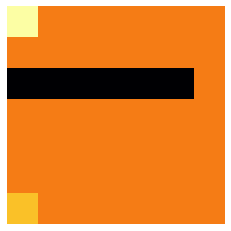

[[ 20  19  18  17  16  15  14]
 [ 19  18  17  16  15  14  13]
 [-10 -10 -10 -10 -10 -10  12]
 [  5   6   7   8   9  10  11]
 [  4   5   6   7   8   9  10]
 [  3   4   5   6   7   8   9]
 [  2   3   4   5   6   7   8]]


In [3]:
reward, state, done = env.select_action(0)
print(reward)
print(state)
print(done)
print(env.steps)
env.print_env()
print(env.val_array)

In [4]:
env.reset_env()

In [5]:
total_reward = []
for i in range(20):
    env.reset_env()
    done = False
    ep_reward = 0
    set_of_states_rand = []
    
    while not done:
        action = np.random.randint(4)
        #print('action: ', action)
        reward, state, done = env.select_action(action)
        set_of_states_rand.append(state)
        ep_reward += reward
        #env.print_env()
        #print(state)
        #print(reward)
        #print('---------------------')
        
    total_reward.append(ep_reward)

#print(total_reward)

In [6]:
total_reward_greedy = []
for i in range(20):
    env.reset_env()
    done = False
    ep_reward = 0
    set_of_states = []
    
    while not done:
        val_choices  = []
        for i in range(4):
            state = env.next_state(env.current_state, i)
            val_choices.append(env.val_array[state[0]][state[1]])
        #print(val_choices)
        action = np.argmax(val_choices)
        #print(action)
        val_choices = []
        #print('action: ', action)
        reward, state, done = env.select_action(action)
        set_of_states.append(state)
        ep_reward += reward
        #env.print_env()
        #print(state)
        #print(reward)
        #print('---------------------')
        
    total_reward_greedy.append(ep_reward)

#print(total_reward_greedy)

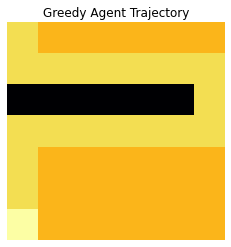

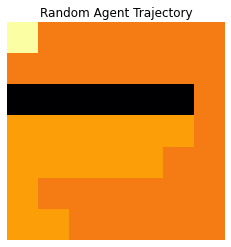

In [7]:
env.print_step(set_of_states, 'Greedy Agent Trajectory')
env.print_step(set_of_states_rand, 'Random Agent Trajectory')

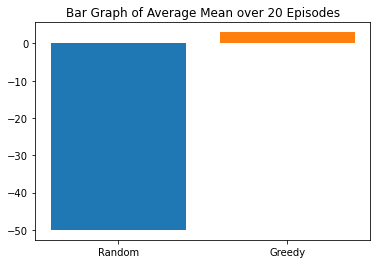

In [9]:
plt.bar('Random', sum(total_reward)/20)
plt.bar('Greedy', sum(total_reward_greedy)/20)
plt.title("Bar Graph of Average Mean over 20 Episodes")
plt.show()